In [310]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [311]:
df = pd.read_csv('/Users/gregorylontok/gd/LMU/fall2018-bi/lecture_material/data/universal_bank.csv')

In [312]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [313]:
# Set target variable
y = df['Personal Loan']

In [314]:
model_stats = {
    'model' : [],
    'accuracy' : []
}

# Logistic Regression

In [315]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [316]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [317]:
predictions = model.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [318]:
logistic_regression_accuracy = metrics.accuracy_score(y, predictions)
model_stats['model'].append('Logistic Regression')
model_stats['accuracy'].append(logistic_regression_accuracy)
logistic_regression_accuracy

0.9488

precision = specificity

precision: ability of a classification model to return only relevant instances


recall = sensitivity

recall: ability of a classification model to identify all relevant instances


F1 score: single metric that combines recall and precision using the harmonic mean


In [319]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2244
          1       0.86      0.60      0.71       256

avg / total       0.95      0.95      0.94      2500



In [320]:
print(confusion_matrix(y, predictions))

[[2219   25]
 [ 103  153]]


In [321]:
pd.crosstab(y, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2219,25,2244
1,103,153,256
All,2322,178,2500


True positive (0 - 0) = 2219

False positive (1 - 0) = 103

True negative (0 - 1) = 25

False negative (1 - 1) = 153

In [322]:
pd.DataFrame(model.coef_, index = ['Coef'], columns = X.columns).T

,Coef
Experience,-0.002810
Income,0.040379
Family,0.391224
Education,1.014910
Securities Account,-0.841519
CD Account,3.091923
Online,-0.465703
CreditCard,-0.977924


In [323]:
print(model.predict_proba(X))

[[9.94332265e-01 5.66773468e-03]
 [9.98004336e-01 1.99566403e-03]
 [9.99153194e-01 8.46806452e-04]
 ...
 [9.84061048e-01 1.59389522e-02]
 [9.33468620e-01 6.65313804e-02]
 [9.94149233e-01 5.85076709e-03]]


In [324]:
import statsmodels.api as sm

X = df.drop(['Personal Loan','ID', 'ZIP Code'], axis=1)

model = sm.Logit(y, X).fit()
predictions = model.predict(X)

Optimization terminated successfully.
         Current function value: 0.141528
         Iterations 9


In [325]:
predictions[0:5]

0    0.002074
1    0.000230
2    0.000198
3    0.028615
4    0.002014
dtype: float64

In [326]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 2500
Model:                          Logit   Df Residuals:                     2489
Method:                           MLE   Df Model:                           10
Date:                Tue, 27 Nov 2018   Pseudo R-squ.:                  0.5715
Time:                        18:44:16   Log-Likelihood:                -353.82
converged:                       True   LL-Null:                       -825.81
                                        LLR p-value:                2.167e-196
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4765      0.029    -16.403      0.000      -0.533      -0.420
Experience             0.4815      0.033     14.651      0.000       0.417       0.546
Income                 0.0472      0.003     14.736      0.000       0.041       0.054
Family                 0.6192      0.097      6.397      0.000       0.430       0.809
CCAvg                  0.1290      0.051      2.510      0.012       0.028       0.230
Education              1.5641      0.149     10.510      0.000       1.272       1.856
Mortgage            8.971e-05      0.001      0.118      0.906      -0.001       0.002
Securities Account    -1.3072      0.404     -3.233      0.001      -2.100      -0.515
CD Account             3.8929      0.435      8.955      0.000       3.041       4.745
Online                -0.4808      0.211     -2.276      0.023      -0.895      -0.067
CreditCard            -1.2402      0.281     -4.407      0.000      -1.792      -0.689
======================================================================================
"""

In [327]:
pd.crosstab(y, round(predictions), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,2208,36,2244
1,94,162,256
All,2302,198,2500


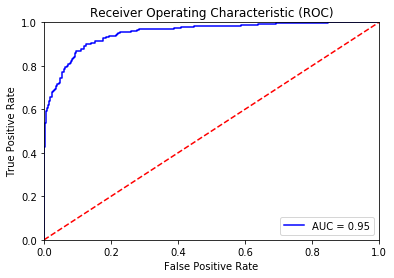

In [328]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

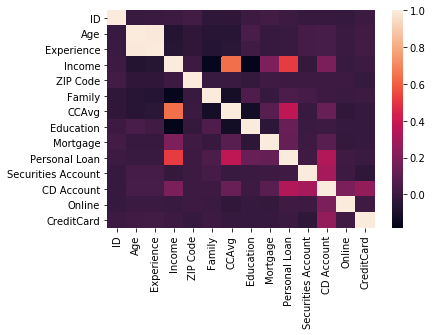

In [329]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# KNN

In [330]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [331]:
model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [332]:
predictions= model.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [333]:
knn_accuracy = metrics.accuracy_score(y, predictions)
model_stats['model'].append('KNN')
model_stats['accuracy'].append(knn_accuracy)
knn_accuracy

0.9428

In [334]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2244
          1       0.85      0.54      0.66       256

avg / total       0.94      0.94      0.94      2500



In [335]:
pd.crosstab(y, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2219,25,2244
1,118,138,256
All,2337,163,2500


In [336]:
# precision = True Positives / (True Positives + False Positives)
precision_0 = 2219 / (2219 + 118)
precision_0

0.9495079161317929

In [337]:
# precision = True Positives / (True Positives + False Positives)
precision_1 = 138 / (138 + 25)
precision_1

0.8466257668711656

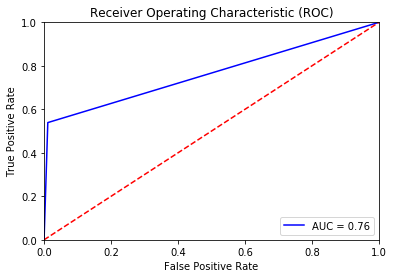

In [338]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Trees

In [339]:
X = df[['Education', 'Family', 'CD Account']]

In [340]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [341]:
predictions = model.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [342]:
decision_tree_accuracy = metrics.accuracy_score(y, predictions)
model_stats['model'].append('Decision Tree')
model_stats['accuracy'].append(decision_tree_accuracy)
decision_tree_accuracy

0.9112

In [343]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2244
          1       0.74      0.21      0.32       256

avg / total       0.90      0.91      0.89      2500



In [344]:
pd.crosstab(y, predictions, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,2225,19,2244
1,203,53,256
All,2428,72,2500


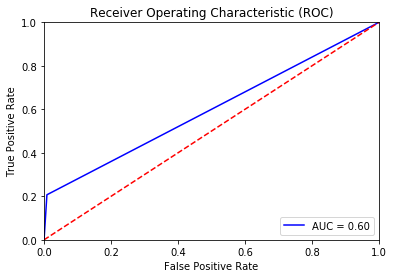

In [345]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [346]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.610069
Education,0.246000
Family,0.143930


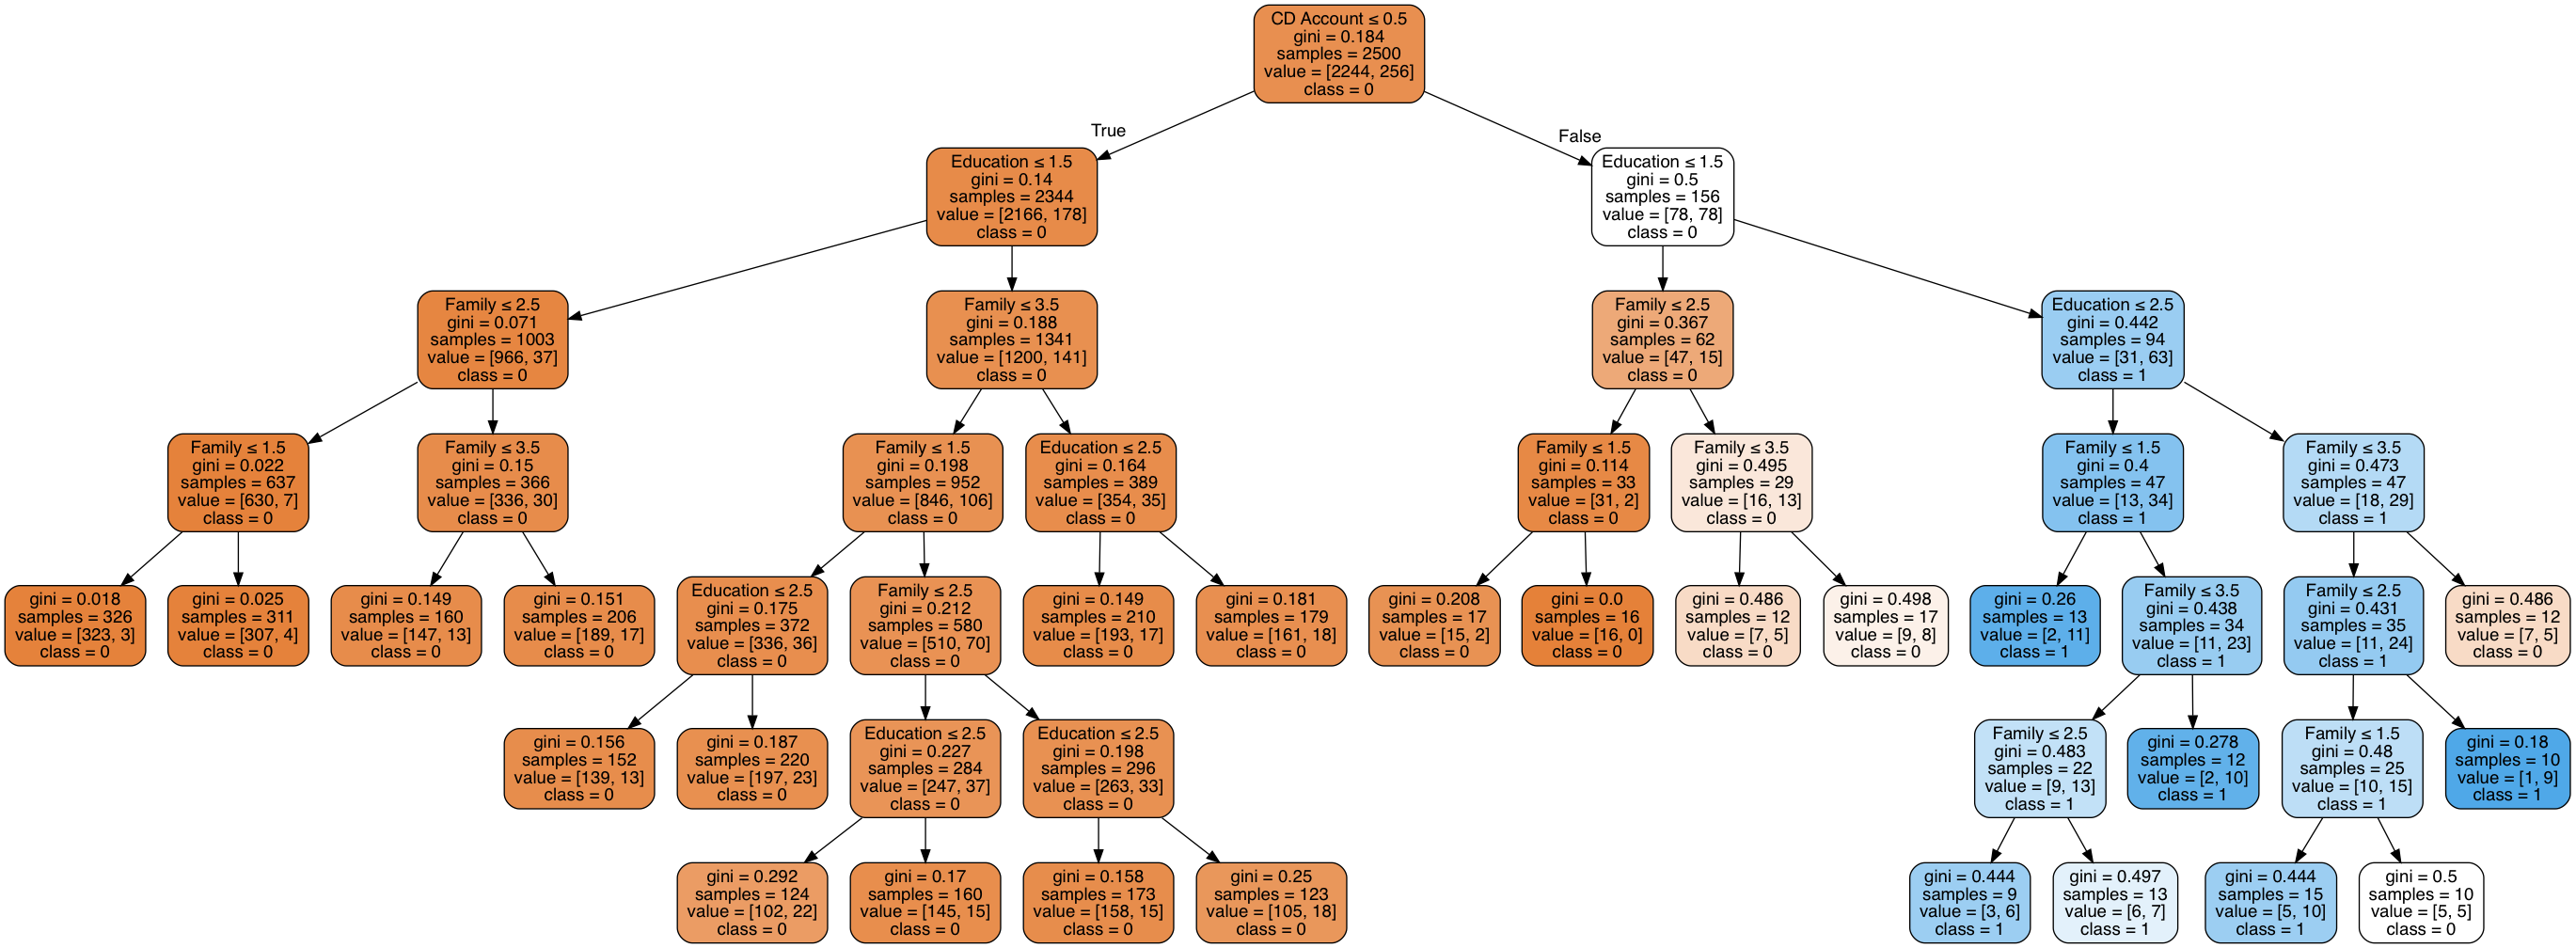

In [347]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

# only 1 tree in DecisionTreeClassifier
export_graphviz(model, out_file=dot_data,
                feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [348]:
X = df[['Education', 'Family', 'CD Account']]

In [349]:
model = RandomForestClassifier(n_estimators=3)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [350]:
# X = df[['Education', 'Family', 'CD Account']]
#predictions = model.predict([[1, 1, 0]]) # ID 10 -> PL 0
#predictions = model.predict([[2, 1, 1]]) # ID 30 -> PL 1
#predictions = model.predict([[3, 4, 1]])
predictions = model.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [351]:
random_forest_accuracy = metrics.accuracy_score(y, predictions)
model_stats['model'].append('Random Forest')
model_stats['accuracy'].append(random_forest_accuracy)
random_forest_accuracy

0.9104

In [352]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2244
          1       0.67      0.25      0.36       256

avg / total       0.89      0.91      0.89      2500



In [353]:
pd.crosstab(y, predictions, rownames = ['True'], colnames = ['Predictions'], margins = True)

Predictions,0,1,All
True,,,
0,2213,31,2244
1,193,63,256
All,2406,94,2500


In [354]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.646202
Education,0.204614
Family,0.149184


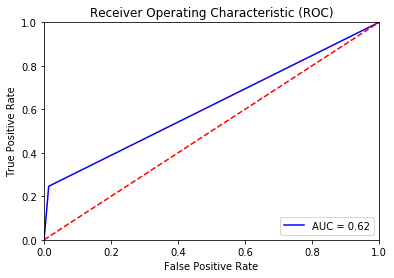

In [355]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [356]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Tree 01

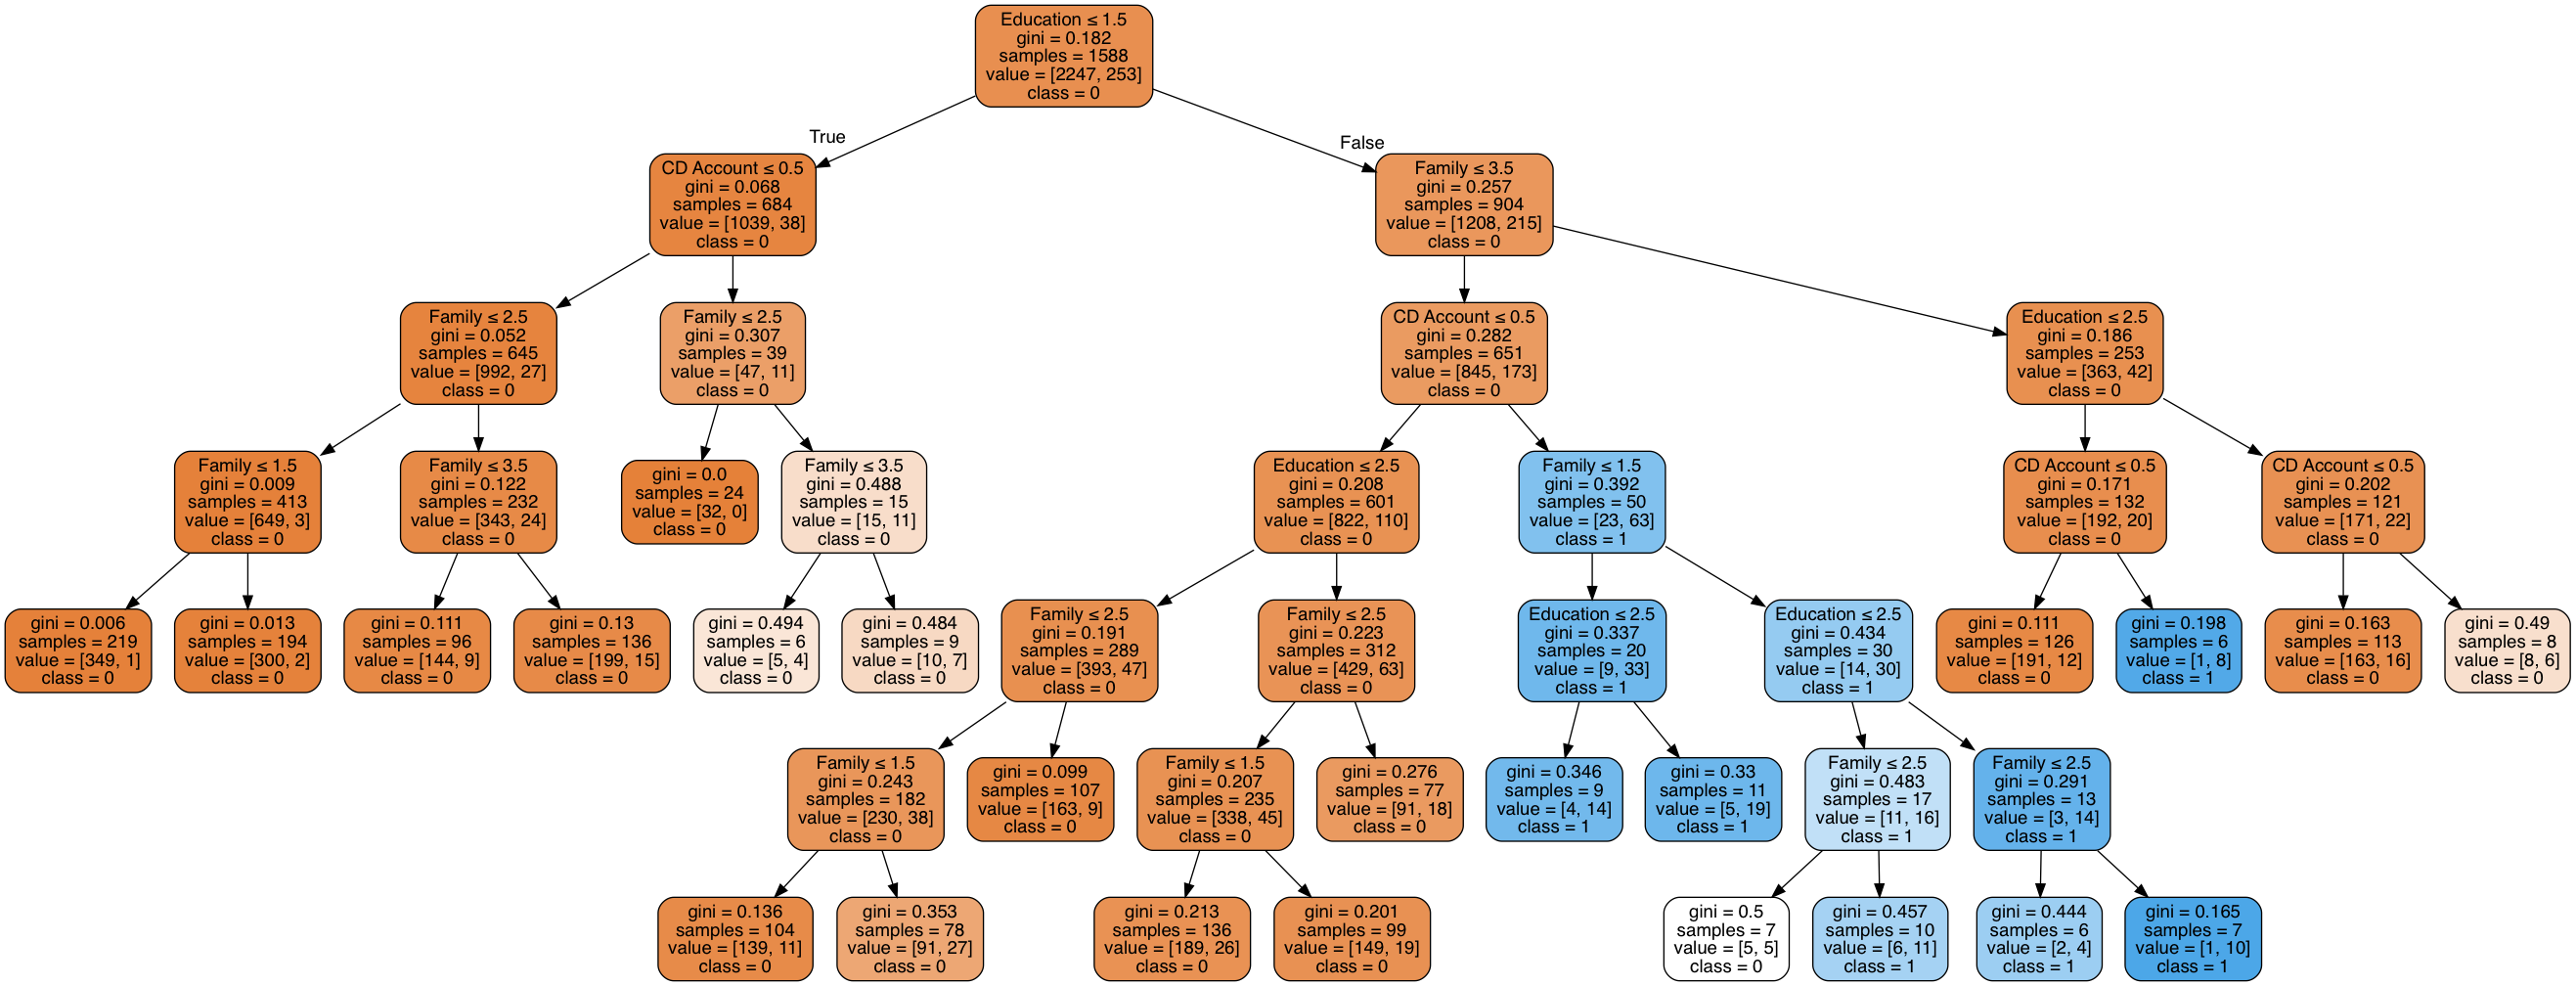

In [357]:
dot_data = StringIO()

estimator = model.estimators_[0]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 02

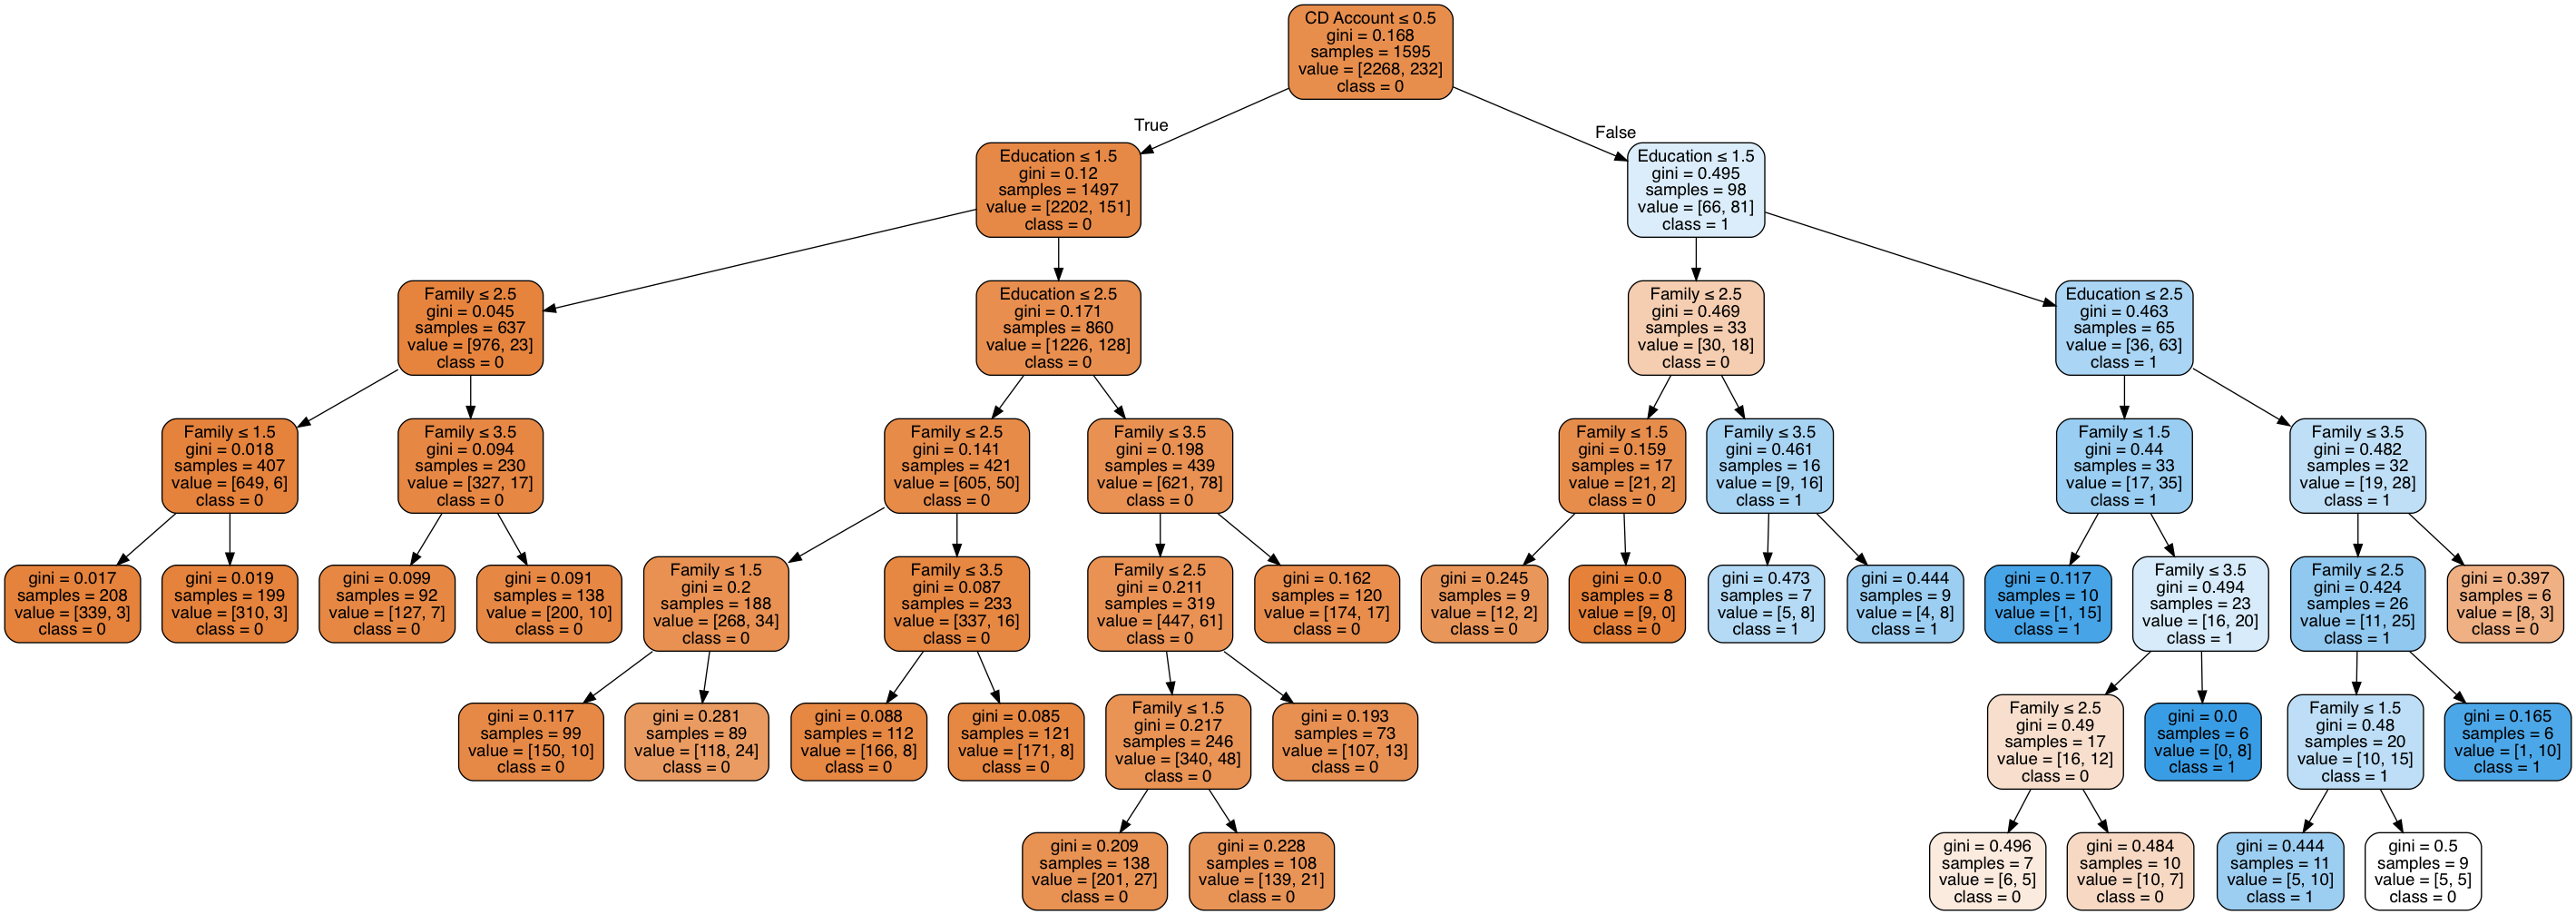

In [358]:
dot_data = StringIO()
estimator = model.estimators_[1]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 03

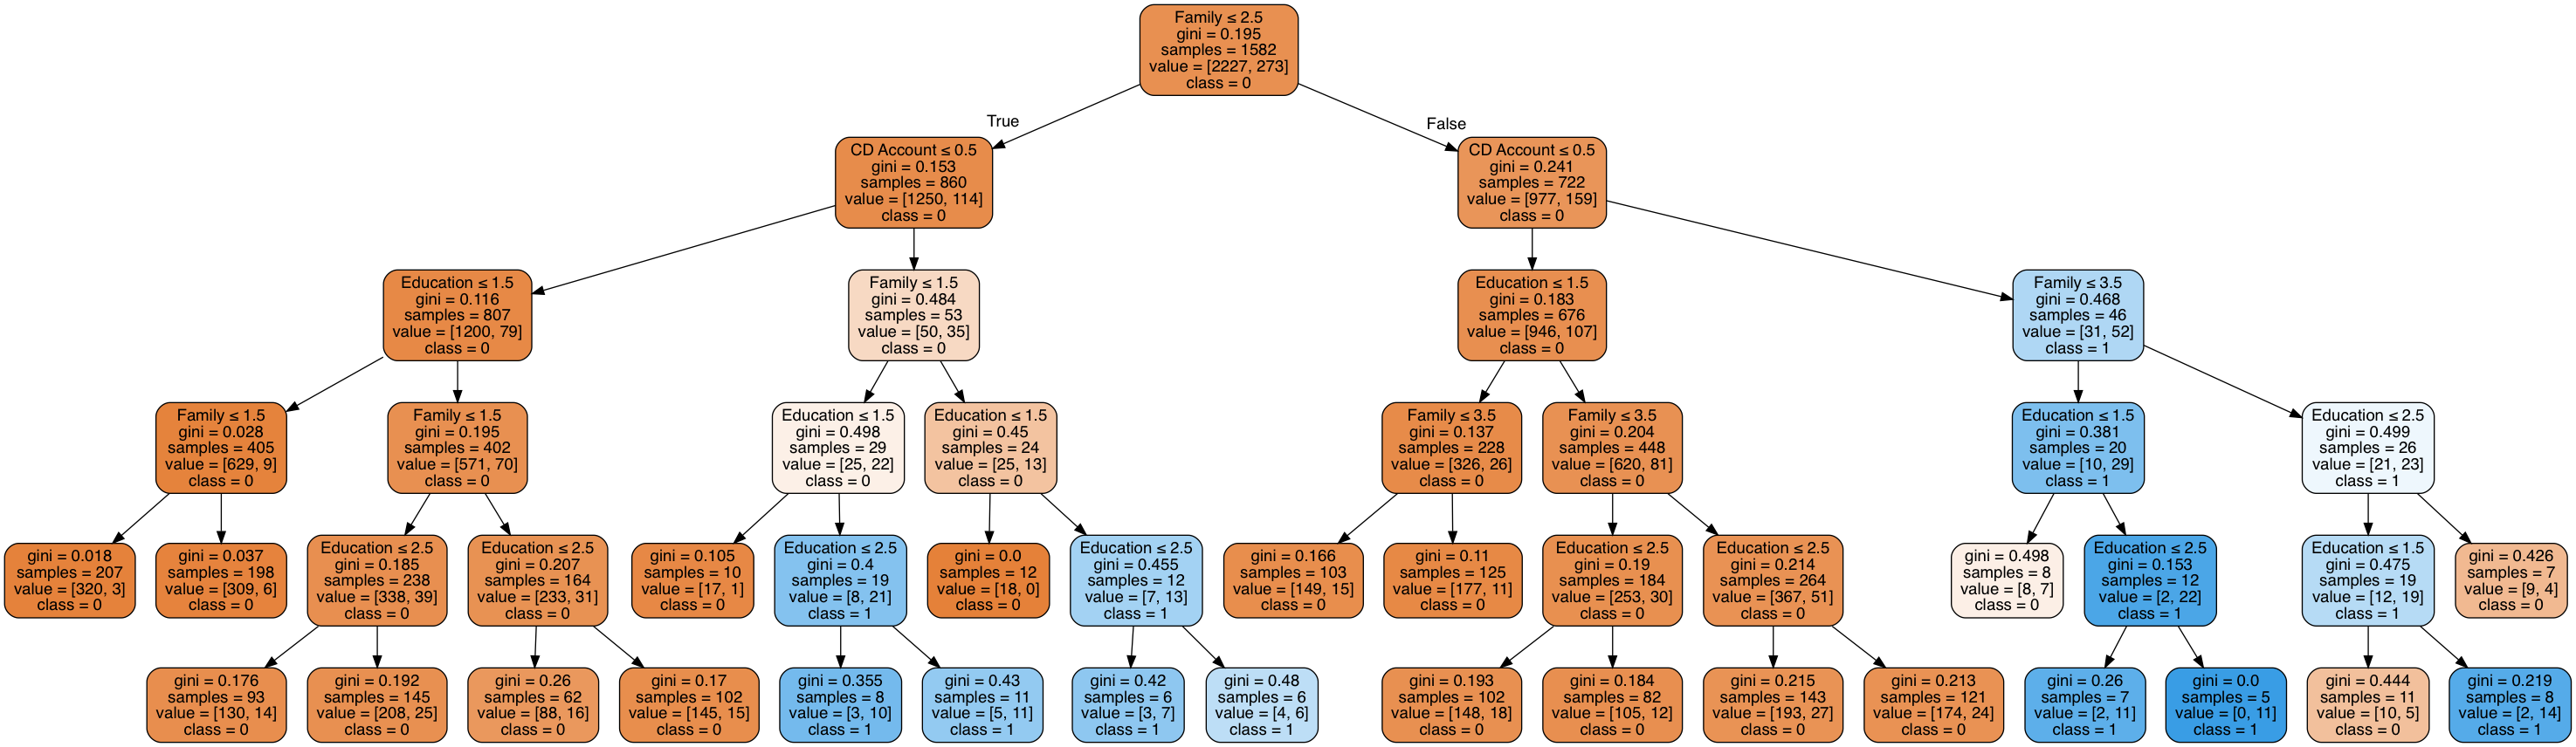

In [359]:
dot_data = StringIO()
estimator = model.estimators_[2]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [363]:
model_stats_df = pd.DataFrame(model_stats)
model_stats_df

,model,accuracy
0,Logistic Regression,0.9488
1,KNN,0.9428
2,Decision Tree,0.9112
3,Random Forest,0.9104


### Features

- Logistic Regression
- K-nearest Neighbors
```python
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
```

- Decision Tree
- Random Forest
```python
X = df[['Education', 'Family', 'CD Account']]
```